In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import pickle
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.subplots as sp

## Procesamiento de Datos COVID

In [2]:
basepath = "/media/jonathan/JHON/Tesis/DatosTesis/Data_Covid19/covid19FEB_JUL.csv"
data = pd.read_csv(basepath, sep=';',dtype={"municipio_distrito": str,
                                        "tasa_incidencia_acumulada_ultimos_14dias": str,
                                        "tasa_incidencia_acumulada_total": str},index_col='fecha_informe',parse_dates=True, usecols=[0,1,3], encoding='latin-1')

data['TasaIncidenciaAcumulada_Ultimos14dias'] = [int(value.split(",",1)[0]) for value in data['tasa_incidencia_acumulada_ultimos_14dias']]
#data.dtypes

basepath = "/media/jonathan/JHON/Tesis/DatosTesis/Data_Covid19/covid19JUL_2022.csv"
data2 = pd.read_csv(basepath, sep=';',dtype={"municipio_distrito": str,
                                        "tasa_incidencia_acumulada_ultimos_14dias": str,
                                        "tasa_incidencia_acumulada_total": str},index_col='fecha_informe',parse_dates=True, usecols=[0,1,5], encoding='latin-1')

data2['TasaIncidenciaAcumulada_Ultimos14dias'] = [int(value.split(",",1)[0]) for value in data2['tasa_incidencia_acumulada_ultimos_14dias']]
data2.head(5)
#data.iloc[970:1000,:]
#data2.head(5)
#data.dtypes


,municipio_distrito,tasa_incidencia_acumulada_ultimos_14dias,TasaIncidenciaAcumulada_Ultimos14dias
fecha_informe,,,
2022-03-29 11:51:00,Madrid-Retiro,"301,6",301
2022-03-29 11:51:00,Madrid-Salamanca,"266,5",266
2022-03-29 11:51:00,Madrid-Centro,"273,97",273
2022-03-29 11:51:00,Madrid-Arganzuela,"241,57",241
2022-03-29 11:51:00,Madrid-Chamartín,"265,67",265


In [3]:
table = pd.pivot_table(data, values=["TasaIncidenciaAcumulada_Ultimos14dias"], index=["fecha_informe"], columns=["municipio_distrito"], aggfunc={"TasaIncidenciaAcumulada_Ultimos14dias":"first"})
table.head(5)

table2 = pd.pivot_table(data2, values=["TasaIncidenciaAcumulada_Ultimos14dias"], index=["fecha_informe"], columns=["municipio_distrito"], aggfunc={"TasaIncidenciaAcumulada_Ultimos14dias":"first"})
table2.head(5)

table = table.astype(np.float64)
table2 = table2.astype(np.float64)

#Quitamos los niveles sobrantes del nivel superior y reiniciamos index - Solo se hace una vez de lo contrario genera problema
table.columns =[str(s2) for (s1,s2) in table.columns.tolist()]
table_Final = table.reset_index()
table_Final.set_index('fecha_informe', inplace = True)

table2.columns =[str(s2) for (s1,s2) in table2.columns.tolist()]
table2_Final = table2.reset_index()
table2_Final.set_index('fecha_informe', inplace = True)

#table.dtypes
#table.iloc[120:127,97:115]
table2_Final.head(2)


,Ajalvir,Alameda del Valle,Alcalá de Henares,Alcobendas,Alcorcón,Aldea del Fresno,Algete,Alpedrete,Ambite,Anchuelo,...,Villamanta,Villamantilla,Villanueva de Perales,Villanueva de la Cañada,Villanueva del Pardillo,Villar del Olmo,Villarejo de Salvanés,Villaviciosa de Odón,Villavieja del Lozoya,Zarzalejo
fecha_informe,,,,,,,,,,,,,,,,,,,,,
2020-05-26 07:00:00,21.0,0.0,24.0,9.0,26.0,70.0,4.0,20.0,0.0,0.0,...,0.0,69.0,0.0,27.0,17.0,0.0,40.0,14.0,0.0,180.0
2020-06-02 07:00:00,0.0,0.0,18.0,7.0,24.0,35.0,38.0,13.0,0.0,0.0,...,0.0,69.0,0.0,51.0,17.0,0.0,13.0,25.0,0.0,0.0


## Procesamiento de datos Trayecto

In [4]:
def df_origen(origen,destino):     
    
    ######################PICKLE###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)

    df = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Referencia2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)    
    
    ######################PICKLE 1###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento1.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df1 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    ######################PICKLE 2###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    ######################PICKLE 3###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento3.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df3 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    ######################PICKLE 4###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento4.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df4 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento4.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    ######################PICKLE 5###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento5.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df5 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento5.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    ######################PICKLE 6###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento6.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df6 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento6.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df.columns   
    names_1 = list(columns_names_df)   
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    df_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Referencia2.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)    
    
    #Filtramos el destino
    columns_names_df = df1.columns   
    names_1 = list(columns_names_df)    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)
    df1_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)

    #Filtramos el destino
    columns_names_df = df2.columns   
    names_1 = list(columns_names_df)    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)
    df2_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)
    
    #Filtramos el destino
    columns_names_df = df3.columns   
    names_1 = list(columns_names_df)    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)
    df3_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)
    
    #Filtramos el destino
    columns_names_df = df4.columns   
    names_1 = list(columns_names_df)    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)
    df4_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento4.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)
    
    #Filtramos el destino
    columns_names_df = df5.columns   
    names_1 = list(columns_names_df)   
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    df5_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento5.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)    

    #Filtramos el destino
    columns_names_df = df6.columns   
    names_1 = list(columns_names_df)   
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    df6_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento6.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)    
    
    #Cambiamos la frecuencia a dias
    df_Final.index.freq = df_Final.index.inferred_freq
    df_Dia = df_Final.resample('24H').sum()
    
    df1_Final.index.freq = df1_Final.index.inferred_freq
    df1_Dia = df1_Final.resample('24H').sum()
    
    df2_Final.index.freq = df2_Final.index.inferred_freq
    df2_Dia = df2_Final.resample('24H').sum()
    
    df3_Final.index.freq = df3_Final.index.inferred_freq
    df3_Dia = df3_Final.resample('24H').sum()
    
    df4_Final.index.freq = df4_Final.index.inferred_freq
    df4_Dia = df4_Final.resample('24H').sum()
    
    df5_Final.index.freq = df5_Final.index.inferred_freq
    df5_Dia = df5_Final.resample('24H').sum()
    
    df6_Final.index.freq = df6_Final.index.inferred_freq
    df6_Dia = df6_Final.resample('24H').sum()
    
    return df_Final, df1_Final, df2_Final, df3_Final, df4_Final, df5_Final, df6_Final, df_Dia, df1_Dia, df2_Dia, df3_Dia, df4_Dia, df5_Dia, df6_Dia, listaDst

origen = "2807905"
destino = "2807901"
Trayecto = origen + "-" + destino
df_Final, df1_Final, df2_Final, df3_Final, df4_Final, df5_Final, df6_Final, df_Dia, df1_Dia, df2_Dia, df3_Dia, df4_Dia, df5_Dia, df6_Dia, listaDst = df_origen(origen,destino)
df2_Dia.tail(2)

,2807905-2807901
ds,
2020-07-30,9121.448
2020-07-31,8734.364


## 26 Febrero 2020 - 15 Marzo 2020

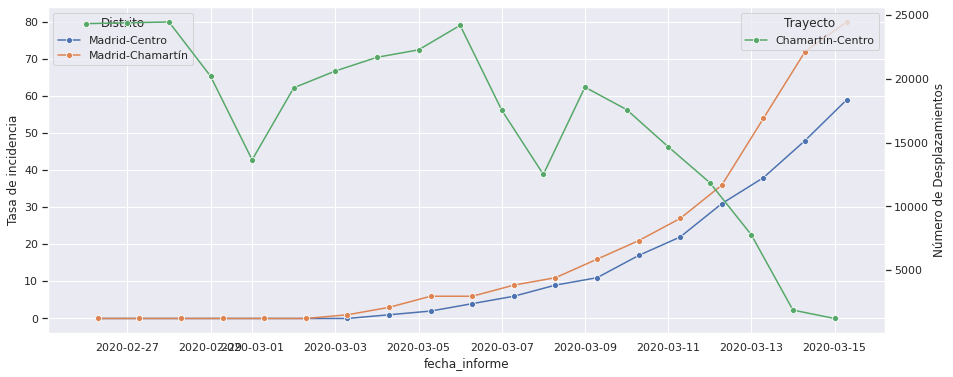

In [5]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table_Final.columns
Distrito_1 = "Madrid-Chamar"
Distrito_2 = "Madrid-Centro"

cont=1

for distrito in columns_names:        
    
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)
    
    if (x==True) | (y==True):       
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table_Final.loc['2020-02-26':'2020-03-15'],legend='brief',label=distrito, marker="o")                        
        graph.set(ylabel='Tasa de incidencia')
        graph.legend(loc='upper left', title='Distrito')
        
#Creamos dicionario para buscar el nombre de cada distrito
for line in listaDst:            
    if line=="ds":
        continue
    origen = line.split("-",1)[0]
    destino = line.split("-",1)[1]    
    lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}    
        

ax2 = plt.twinx()
graph=sb.lineplot(x="ds", y=listaDst[1], data=df_Dia.loc['2020-02-26':'2020-03-15'],legend='brief',label=lines_names[origen]+"-"+lines_names[destino], color="g", ax=ax2,marker="o")                        
graph.set(ylabel='Número de Desplazamientos')
graph.legend(loc='upper right',title='Trayecto')
graph.grid(False)

        


## 16 Marzo 2020 - 15 Abril 2020

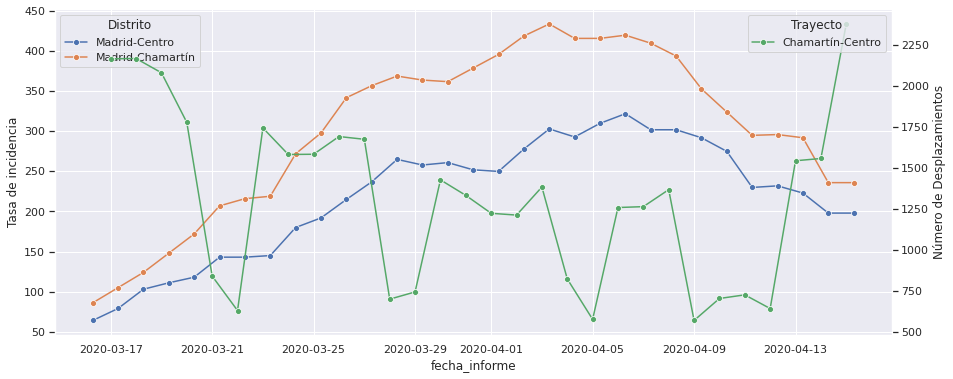

In [6]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table_Final.columns
cont=1

for distrito in columns_names:            
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)    
    if (x==True) | (y==True):       
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table_Final.loc['2020-03-16':'2020-04-15'],legend='brief',label=distrito, marker="o")                
        graph.set(ylabel='Tasa de incidencia')
        graph.legend(loc='upper left', title='Distrito')
        
#Creamos dicionario para buscar el nombre de cada distrito
for line in listaDst:            
    if line=="ds":
        continue
    origen = line.split("-",1)[0]
    destino = line.split("-",1)[1]    
    lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}            
        
ax2 = plt.twinx()
graph=sb.lineplot(x="ds", y=listaDst[1], data=df1_Dia.loc['2020-03-16':'2020-04-15'],legend='brief',label=lines_names[origen]+"-"+lines_names[destino], color="g", ax=ax2, marker="o")                        
graph.set(ylabel='Número de Desplazamientos')
graph.legend(loc='upper right',title='Trayecto')
graph.grid(False)
        

## 16 Abril 2020 - 15 Mayo 2020

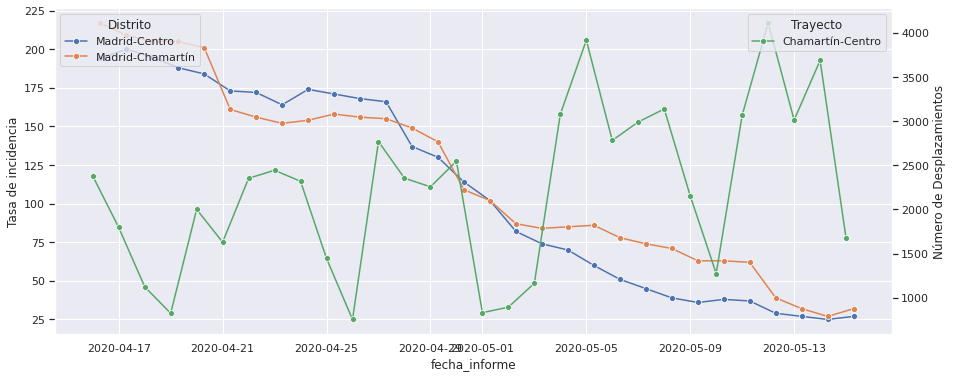

In [7]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table_Final.columns
cont=1

for distrito in columns_names:            
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)    
    if (x==True) | (y==True):
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table_Final.loc['2020-04-16':'2020-05-15'],legend='brief',label=distrito, marker="o")                
        graph.set(ylabel='Tasa de incidencia')
        graph.legend(loc='upper left', title='Distrito')
        
#Creamos dicionario para buscar el nombre de cada distrito
for line in listaDst:            
    if line=="ds":
        continue
    origen = line.split("-",1)[0]
    destino = line.split("-",1)[1]    
    lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}            

ax2 = plt.twinx()
graph=sb.lineplot(x="ds", y=listaDst[1], data=df1_Dia.loc['2020-04-16':'2020-05-15'],legend='brief',label=lines_names[origen]+"-"+lines_names[destino], color="g", ax=ax2, marker="o")                        
graph.set(ylabel='Número de Desplazamientos')
graph.legend(loc='upper right',title='Trayecto')
graph.grid(False)

## 16 Mayo 2020 - 31 Mayo 2020

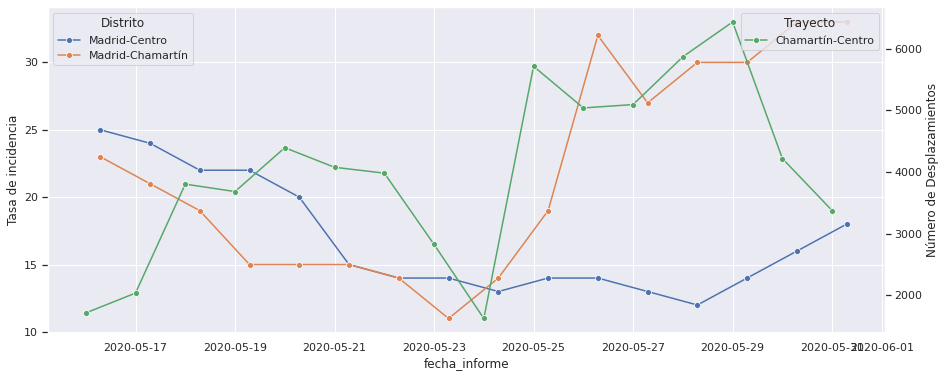

In [8]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table_Final.columns
cont=1

for distrito in columns_names:            
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)
    
    if (x==True) | (y==True):
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table_Final.loc['2020-05-16':'2020-05-31'],legend='brief',label=distrito, marker="o")                
        graph.set(ylabel='Tasa de incidencia')
        graph.legend(loc='upper left', title='Distrito')
        
#Creamos dicionario para buscar el nombre de cada distrito
for line in listaDst:            
    if line=="ds":
        continue
    origen = line.split("-",1)[0]
    destino = line.split("-",1)[1]    
    lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}            
        
ax2 = plt.twinx()
graph=sb.lineplot(x="ds", y=listaDst[1], data=df1_Dia.loc['2020-05-16':'2020-05-31'],legend='brief',label=lines_names[origen]+"-"+lines_names[destino], color="g", ax=ax2, marker="o")                        
graph.set(ylabel='Número de Desplazamientos')
graph.legend(loc='upper right',title='Trayecto')
graph.grid(False)

## 1 Junio 2020 - 30 Junio 2020

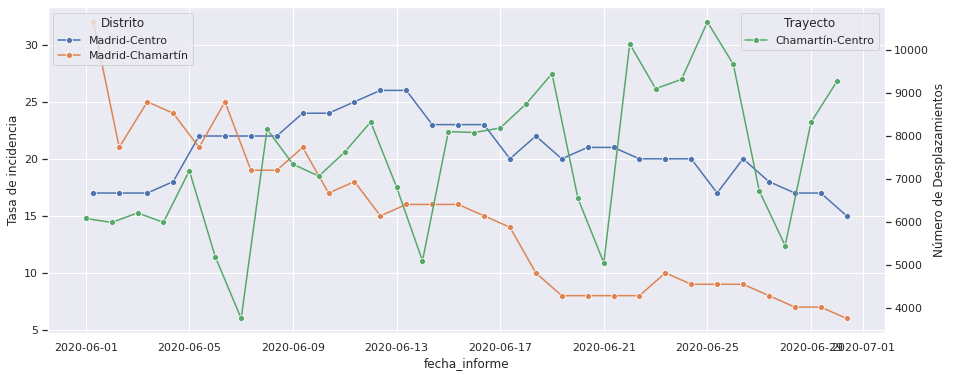

In [9]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table_Final.columns
cont=1

for distrito in columns_names:            
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)    
    if (x==True) | (y==True):
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table_Final.loc['2020-06-01':'2020-06-30'],legend='brief',label=distrito, marker="o")                
        graph.set(ylabel='Tasa de incidencia')
        graph.legend(loc='upper left', title='Distrito')
        
#Creamos dicionario para buscar el nombre de cada distrito
for line in listaDst:            
    if line=="ds":
        continue
    origen = line.split("-",1)[0]
    destino = line.split("-",1)[1]    
    lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}            

ax2 = plt.twinx()
graph=sb.lineplot(x="ds", y=listaDst[1], data=df2_Dia.loc['2020-06-01':'2020-06-30'],legend='brief',label=lines_names[origen]+"-"+lines_names[destino], color="g", ax=ax2, marker="o")                        
graph.set(ylabel='Número de Desplazamientos')
graph.legend(loc='upper right',title='Trayecto')
graph.grid(False)        

## 1 Julio 2020 - 31 Julio 2020

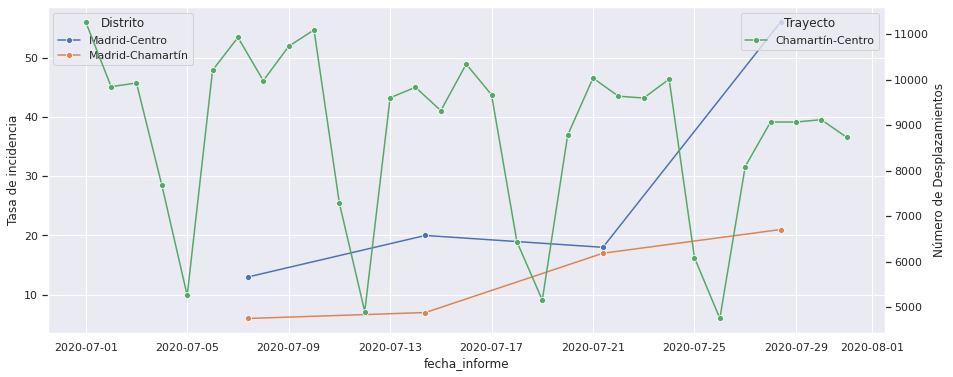

In [10]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table2_Final.columns
cont=1

for distrito in columns_names:            
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)    
    if (x==True) | (y==True):
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table2_Final.loc['2020-07-01':'2020-07-31'],legend='brief',label=distrito, marker="o")                
        graph.set(ylabel='Tasa de incidencia')
        graph.legend(loc='upper left', title='Distrito')
        
#Creamos dicionario para buscar el nombre de cada distrito
for line in listaDst:            
    if line=="ds":
        continue
    origen = line.split("-",1)[0]
    destino = line.split("-",1)[1]    
    lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}            

ax2 = plt.twinx()
graph=sb.lineplot(x="ds", y=listaDst[1], data=df2_Dia.loc['2020-07-01':'2020-07-31'],legend='brief',label=lines_names[origen]+"-"+lines_names[destino], color="g", ax=ax2, marker="o")                        
graph.set(ylabel='Número de Desplazamientos')
graph.legend(loc='upper right',title='Trayecto')
graph.grid(False)     

## 1 Agosto 2020 - 31 Agosto 2020

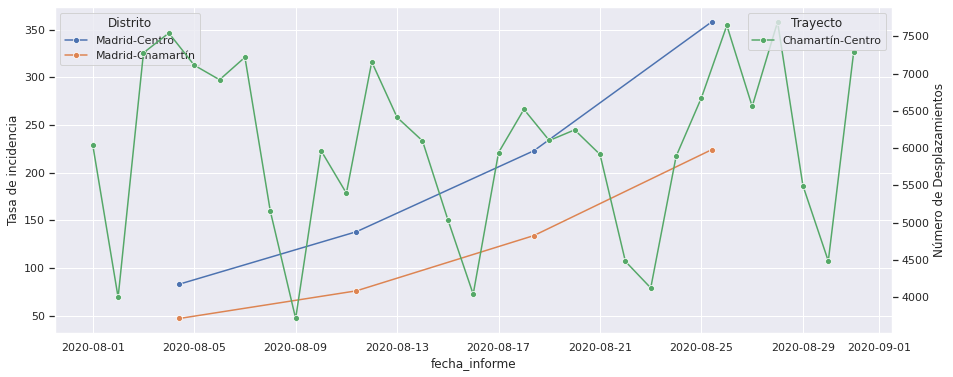

In [11]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table2_Final.columns
cont=1

for distrito in columns_names:            
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)    
    if (x==True) | (y==True):
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table2_Final.loc['2020-08-01':'2020-08-31'],legend='brief',label=distrito, marker="o")                
        graph.set(ylabel='Tasa de incidencia')
        graph.legend(loc='upper left', title='Distrito')
        
#Creamos dicionario para buscar el nombre de cada distrito
for line in listaDst:            
    if line=="ds":
        continue
    origen = line.split("-",1)[0]
    destino = line.split("-",1)[1]    
    lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}            

ax2 = plt.twinx()
graph=sb.lineplot(x="ds", y=listaDst[1], data=df3_Dia.loc['2020-08-01':'2020-08-31'],legend='brief',label=lines_names[origen]+"-"+lines_names[destino], color="g", ax=ax2, marker="o")                        
graph.set(ylabel='Número de Desplazamientos')
graph.legend(loc='upper right',title='Trayecto')
graph.grid(False)
        

## 1 Septiembre 2020 - 30 Septiembre 2020

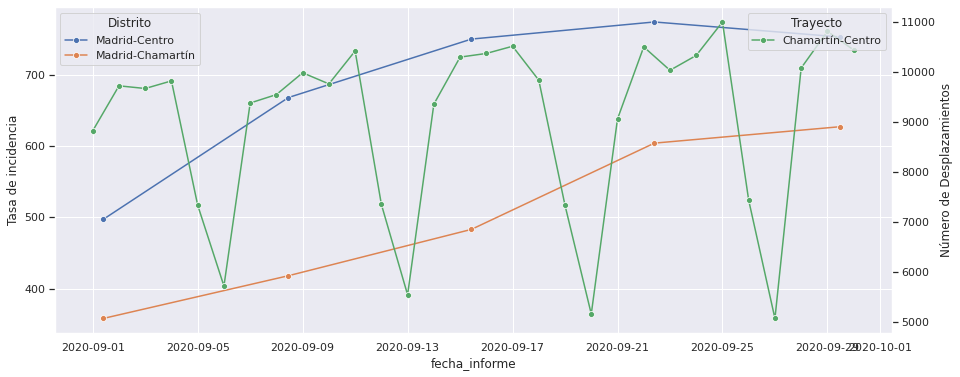

In [12]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table2_Final.columns
cont=1

for distrito in columns_names:            
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)    
    if (x==True) | (y==True):
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table2_Final.loc['2020-09-01':'2020-09-30'],legend='brief',label=distrito, marker="o")                
        graph.set(ylabel='Tasa de incidencia')
        graph.legend(loc='upper left', title='Distrito')
        
#Creamos dicionario para buscar el nombre de cada distrito
for line in listaDst:            
    if line=="ds":
        continue
    origen = line.split("-",1)[0]
    destino = line.split("-",1)[1]    
    lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}            

ax2 = plt.twinx()
graph=sb.lineplot(x="ds", y=listaDst[1], data=df3_Dia.loc['2020-09-01':'2020-09-30'],legend='brief',label=lines_names[origen]+"-"+lines_names[destino], color="g", ax=ax2, marker="o")                        
graph.set(ylabel='Número de Desplazamientos')
graph.legend(loc='upper right',title='Trayecto')
graph.grid(False)        

## 1 Octubre 2020 - 31 Octubre 2020

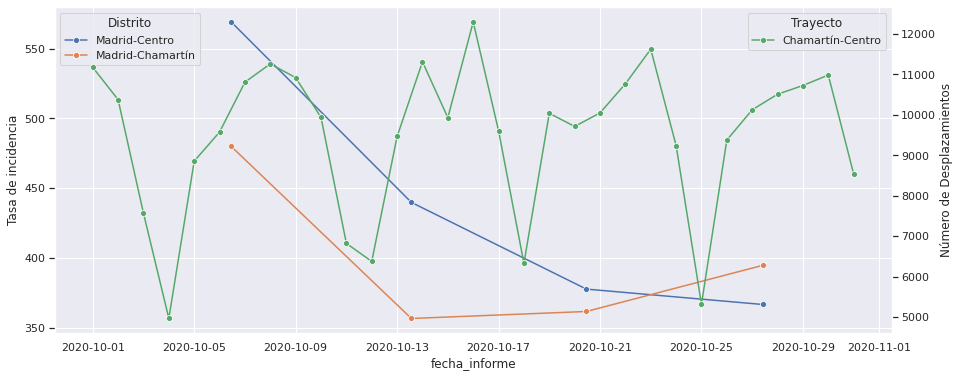

In [13]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table2_Final.columns
cont=1

for distrito in columns_names:        
    
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)    
    if (x==True) | (y==True):
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table2_Final.loc['2020-10-01':'2020-10-31'],legend='brief',label=distrito, marker="o")                
        graph.set(ylabel='Tasa de incidencia')
        graph.legend(loc='upper left', title='Distrito')
        
#Creamos dicionario para buscar el nombre de cada distrito
for line in listaDst:            
    if line=="ds":
        continue
    origen = line.split("-",1)[0]
    destino = line.split("-",1)[1]    
    lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}            

ax2 = plt.twinx()
graph=sb.lineplot(x="ds", y=listaDst[1], data=df3_Dia.loc['2020-10-01':'2020-10-31'],legend='brief',label=lines_names[origen]+"-"+lines_names[destino], color="g", ax=ax2, marker="o")                        
graph.set(ylabel='Número de Desplazamientos')
graph.legend(loc='upper right',title='Trayecto')
graph.grid(False)                

## 1 Noviembre 2020 - 30 Noviembre 2020

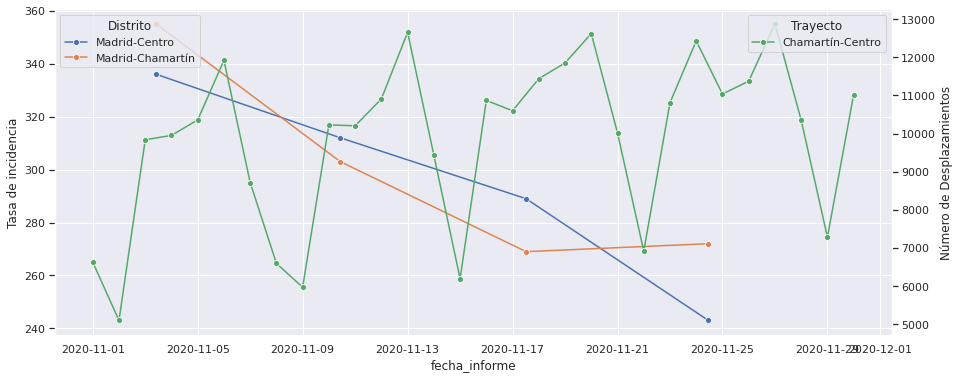

In [14]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table2_Final.columns
cont=1

for distrito in columns_names:            
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)    
    if (x==True) | (y==True):
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table2_Final.loc['2020-11-01':'2020-11-30'],legend='brief',label=distrito, marker="o")                
        graph.set(ylabel='Tasa de incidencia')
        graph.legend(loc='upper left', title='Distrito')
        
#Creamos dicionario para buscar el nombre de cada distrito
for line in listaDst:            
    if line=="ds":
        continue
    origen = line.split("-",1)[0]
    destino = line.split("-",1)[1]    
    lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}            

ax2 = plt.twinx()
graph=sb.lineplot(x="ds", y=listaDst[1], data=df4_Dia.loc['2020-11-01':'2020-11-30'],legend='brief',label=lines_names[origen]+"-"+lines_names[destino], color="g", ax=ax2, marker="o")                        
graph.set(ylabel='Número de Desplazamientos')
graph.legend(loc='upper right',title='Trayecto')
graph.grid(False)           

## 1 Diciembre 2020 - 31 Diciembre 2020

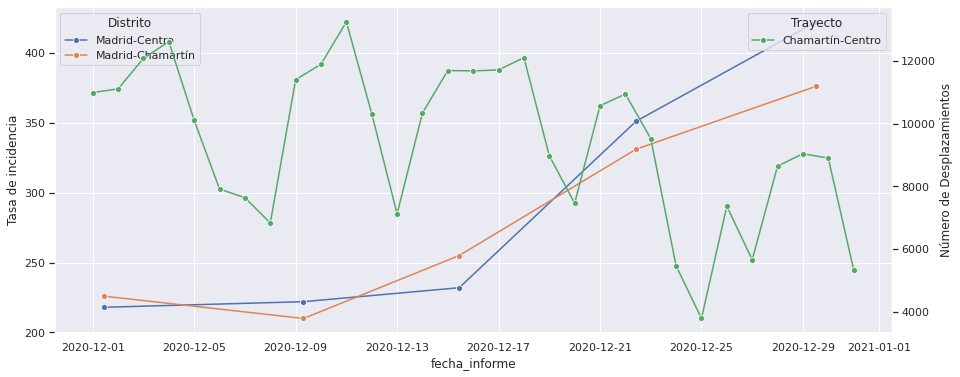

In [15]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table2_Final.columns
cont=1

for distrito in columns_names:            
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)    
    if (x==True) | (y==True):
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table2_Final.loc['2020-12-01':'2020-12-31'],legend='brief',label=distrito, marker="o")                
        graph.set(ylabel='Tasa de incidencia')
        graph.legend(loc='upper left', title='Distrito')
        
#Creamos dicionario para buscar el nombre de cada distrito
for line in listaDst:            
    if line=="ds":
        continue
    origen = line.split("-",1)[0]
    destino = line.split("-",1)[1]    
    lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}            

ax2 = plt.twinx()
graph=sb.lineplot(x="ds", y=listaDst[1], data=df4_Dia.loc['2020-12-01':'2020-12-31'],legend='brief',label=lines_names[origen]+"-"+lines_names[destino], color="g", ax=ax2, marker="o")                        
graph.set(ylabel='Número de Desplazamientos')
graph.legend(loc='upper right',title='Trayecto')
graph.grid(False)           

# Enero 2021

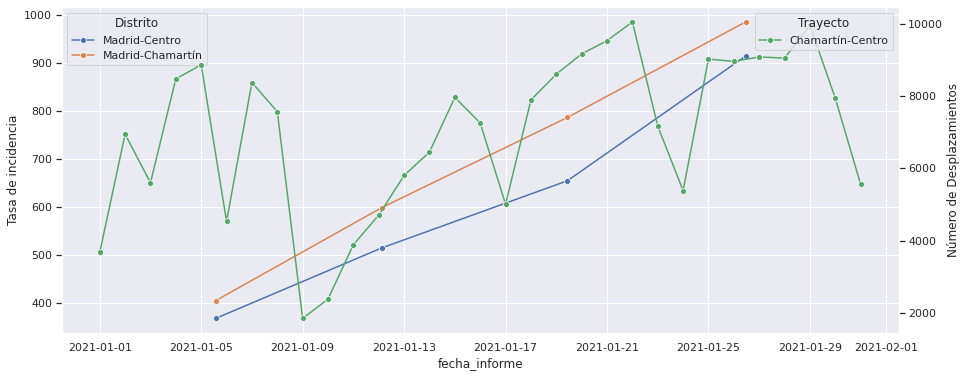

In [16]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table2_Final.columns
cont=1

for distrito in columns_names:            
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)    
    if (x==True) | (y==True):
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table2_Final.loc['2021-01-01':'2021-01-31'],legend='brief',label=distrito, marker="o")                
        graph.set(ylabel='Tasa de incidencia')
        graph.legend(loc='upper left', title='Distrito')
        
#Creamos dicionario para buscar el nombre de cada distrito
for line in listaDst:            
    if line=="ds":
        continue
    origen = line.split("-",1)[0]
    destino = line.split("-",1)[1]    
    lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}            

ax2 = plt.twinx()
graph=sb.lineplot(x="ds", y=listaDst[1], data=df5_Dia.loc['2021-01-01':'2021-01-31'],legend='brief',label=lines_names[origen]+"-"+lines_names[destino], color="g", ax=ax2, marker="o")                        
graph.set(ylabel='Número de Desplazamientos')
graph.legend(loc='upper right',title='Trayecto')
graph.grid(False)      

# Febrero 2021

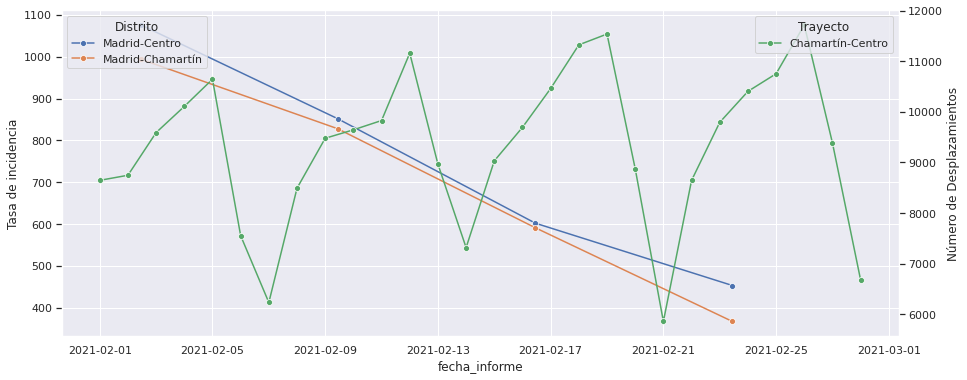

In [17]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table2_Final.columns
cont=1

for distrito in columns_names:            
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)    
    if (x==True) | (y==True):
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table2_Final.loc['2021-02-01':'2021-02-28'],legend='brief',label=distrito, marker="o")                
        graph.set(ylabel='Tasa de incidencia')
        graph.legend(loc='upper left', title='Distrito')
        
#Creamos dicionario para buscar el nombre de cada distrito
for line in listaDst:            
    if line=="ds":
        continue
    origen = line.split("-",1)[0]
    destino = line.split("-",1)[1]    
    lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}            

ax2 = plt.twinx()
graph=sb.lineplot(x="ds", y=listaDst[1], data=df6_Dia.loc['2021-02-01':'2021-02-28'],legend='brief',label=lines_names[origen]+"-"+lines_names[destino], color="g", ax=ax2, marker="o")                        
graph.set(ylabel='Número de Desplazamientos')
graph.legend(loc='upper right',title='Trayecto')
graph.grid(False)      

# Marzo 2021

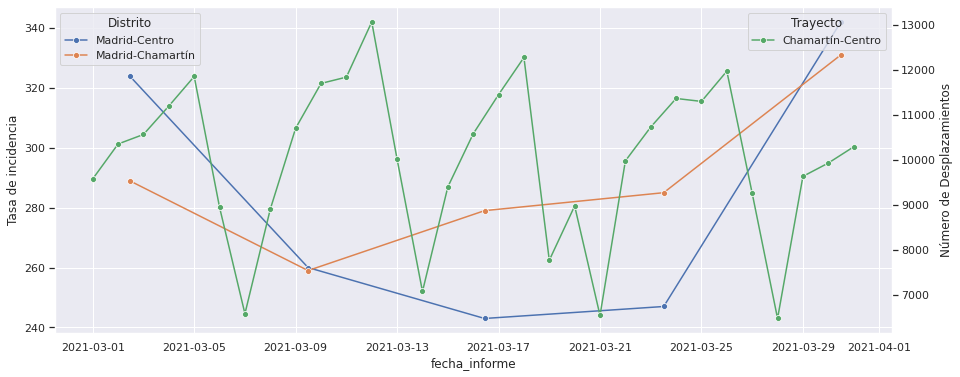

In [18]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table2_Final.columns
cont=1

for distrito in columns_names:            
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)    
    if (x==True) | (y==True):
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table2_Final.loc['2021-03-01':'2021-03-31'],legend='brief',label=distrito, marker="o")                
        graph.set(ylabel='Tasa de incidencia')
        graph.legend(loc='upper left', title='Distrito')
        
#Creamos dicionario para buscar el nombre de cada distrito
for line in listaDst:            
    if line=="ds":
        continue
    origen = line.split("-",1)[0]
    destino = line.split("-",1)[1]    
    lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}            

ax2 = plt.twinx()
graph=sb.lineplot(x="ds", y=listaDst[1], data=df6_Dia.loc['2021-03-01':'2021-03-31'],legend='brief',label=lines_names[origen]+"-"+lines_names[destino], color="g", ax=ax2, marker="o")                        
graph.set(ylabel='Número de Desplazamientos')
graph.legend(loc='upper right',title='Trayecto')
graph.grid(False)      

# Abril - Mayo 2021

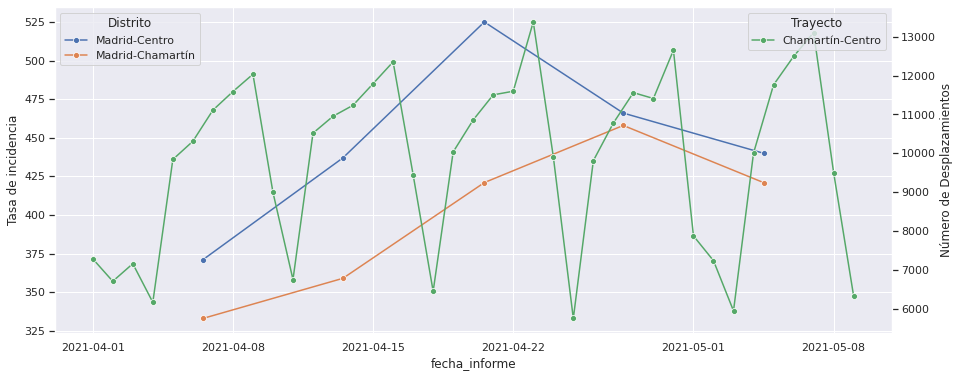

In [19]:
sb.set(rc = {'figure.figsize':(15,6)})
columns_names = table2_Final.columns
cont=1

for distrito in columns_names:            
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)    
    if (x==True) | (y==True):
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table2_Final.loc['2021-04-01':'2021-05-09'],legend='brief',label=distrito, marker="o")                
        graph.set(ylabel='Tasa de incidencia')
        graph.legend(loc='upper left', title='Distrito')
        
#Creamos dicionario para buscar el nombre de cada distrito
for line in listaDst:            
    if line=="ds":
        continue
    origen = line.split("-",1)[0]
    destino = line.split("-",1)[1]    
    lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}            

ax2 = plt.twinx()
graph=sb.lineplot(x="ds", y=listaDst[1], data=df6_Dia.loc['2021-04-01':'2021-05-09'],legend='brief',label=lines_names[origen]+"-"+lines_names[destino], color="g", ax=ax2, marker="o")                        
graph.set(ylabel='Número de Desplazamientos')
graph.legend(loc='upper right',title='Trayecto')
graph.grid(False)      

In [20]:
data1=df_Dia.loc['2020-02-26':'2020-03-16']
data2=df1_Dia.loc['2020-03-17':'2020-05-31']
data3=df2_Dia.loc['2020-06-01':'2020-06-30']
data4=df2_Dia.loc['2020-07-01':'2020-07-31']
data5=df3_Dia.loc['2020-08-01':'2020-10-31']
data6=df4_Dia.loc['2020-11-01':'2021-12-31']
data7=df5_Dia.loc['2021-01-01':'2021-01-31']
data8=df6_Dia.loc['2021-02-01':'2021-05-09']

periodo1 = pd.concat([data1, data2, data3], axis=0)
periodo2 = pd.concat([data4, data5, data6, data7, data8], axis=0)
periodo2.tail(5)

,2807905-2807901
ds,
2021-05-05,11760.649
2021-05-06,12489.624
2021-05-07,13103.482
2021-05-08,9509.397
2021-05-09,6336.879


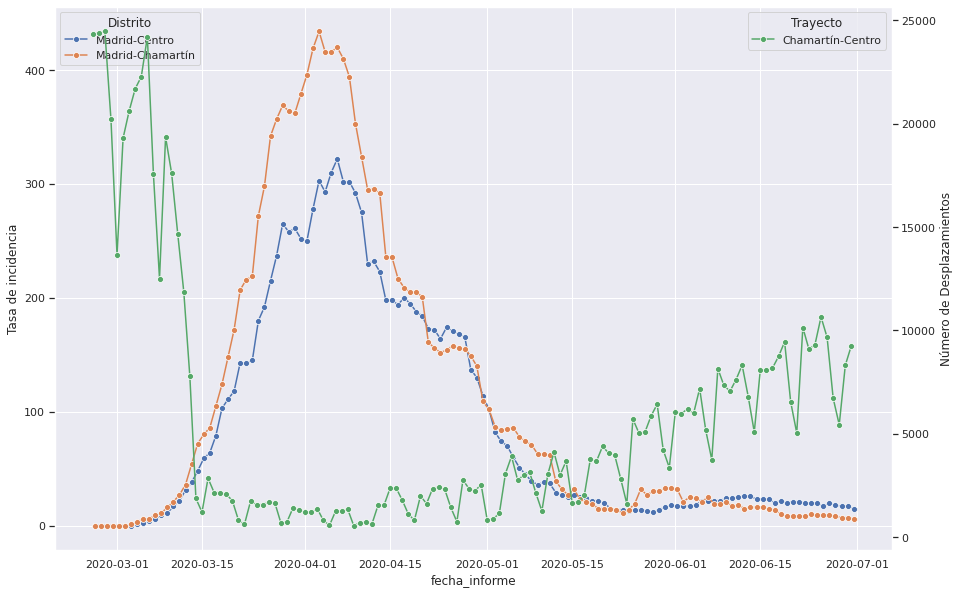

In [21]:
sb.set(rc = {'figure.figsize':(15,10)})
columns_names = table2_Final.columns
cont=1

for distrito in columns_names:            
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)    
    if (x==True) | (y==True):
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table_Final.loc['2020-02-26':'2020-06-30'],legend='brief',label=distrito, marker="o")                        
        graph.set(ylabel='Tasa de incidencia')
        graph.legend(loc='upper left', title='Distrito')        

        
#Creamos dicionario para buscar el nombre de cada distrito
for line in listaDst:            
    if line=="ds":
        continue
    origen = line.split("-",1)[0]
    destino = line.split("-",1)[1]    
    lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid","2807921":"Barajas"}            
    
    
ax2 = plt.twinx()
graph=sb.lineplot(x="ds", y=listaDst[1], data=periodo1 ,legend='brief',label=lines_names[origen]+"-"+lines_names[destino], color="g", ax=ax2, marker="o")                        
graph.set(ylabel='Número de Desplazamientos')
graph.legend(loc='upper right',title='Trayecto')
graph.grid(False)


    

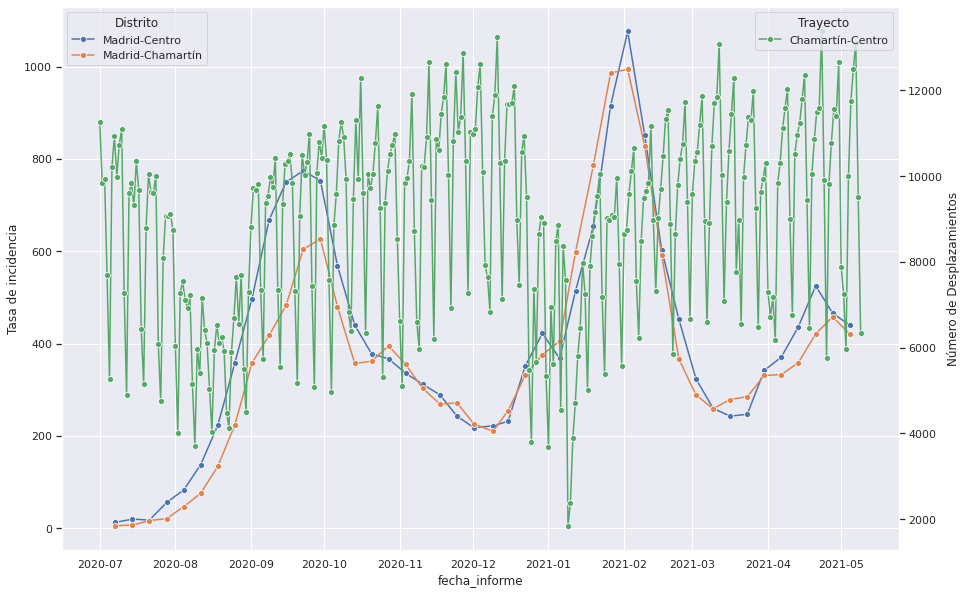

In [22]:
sb.set(rc = {'figure.figsize':(15,10)})
columns_names = table2_Final.columns
cont=1

for distrito in columns_names:            
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)    
    if (x==True) | (y==True):
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table2_Final.loc['2020-07-01':'2021-05-09'],legend='brief',label=distrito, marker="o")                
        graph.set(ylabel='Tasa de incidencia')
        graph.legend(loc='upper left', title='Distrito')  
        
        
#Creamos dicionario para buscar el nombre de cada distrito
for line in listaDst:            
    if line=="ds":
        continue
    origen = line.split("-",1)[0]
    destino = line.split("-",1)[1]    
    lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}            

ax2 = plt.twinx()
graph=sb.lineplot(x="ds", y=listaDst[1], data=periodo2,legend='brief',label=lines_names[origen]+"-"+lines_names[destino], color="g", ax=ax2, marker="o")                        
graph.set(ylabel='Número de Desplazamientos')
graph.legend(loc='upper right',title='Trayecto')
graph.grid(False)


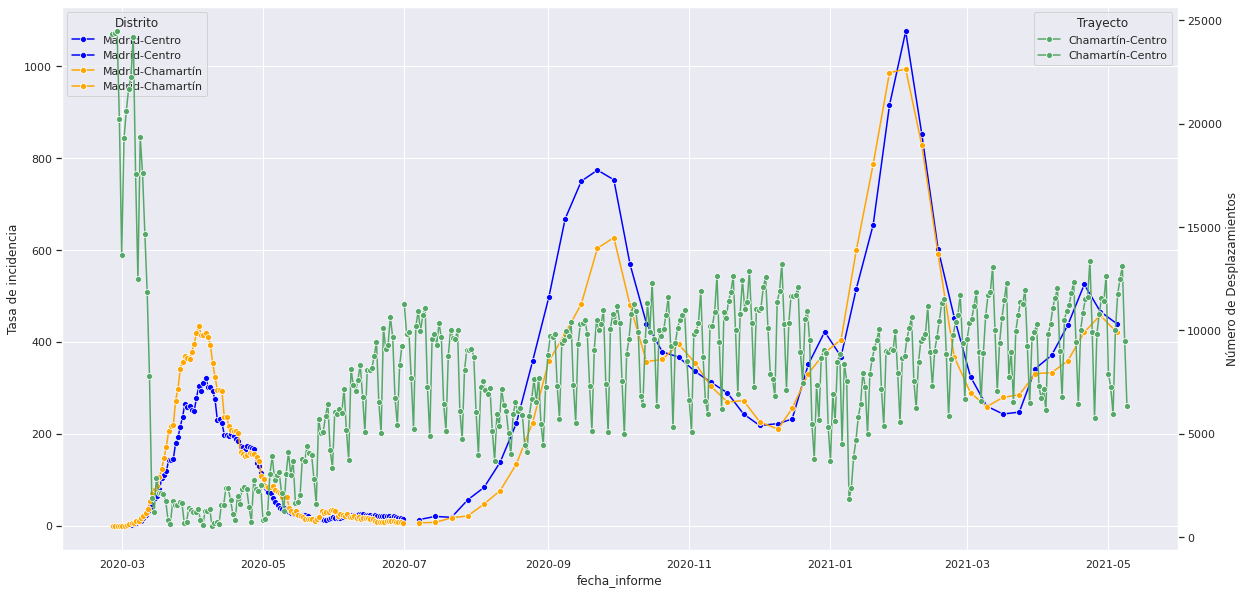

In [23]:
sb.set(rc = {'figure.figsize':(20,10)})
columns_names = table2_Final.columns
colores={1:"blue",2:"orange"}
contador=1

for distrito in columns_names:                
    x=distrito.startswith(Distrito_1)
    y=distrito.startswith(Distrito_2)    
    if (x==True) | (y==True):                
        graph=sb.lineplot(x="fecha_informe", y=distrito, data=table_Final.loc['2020-02-26':'2020-06-30'],legend='brief',label=distrito, marker="o",color=colores[contador])                        
        graph1=sb.lineplot(x="fecha_informe", y=distrito, data=table2_Final.loc['2020-07-01':'2021-05-09'],legend='brief',label=distrito, marker="o",color=colores[contador])                
        graph.set(ylabel='Tasa de incidencia')
        graph.legend(loc='upper left', title='Distrito')        
        contador=contador+1
        
#Creamos dicionario para buscar el nombre de cada distrito
for line in listaDst:            
    if line=="ds":
        continue
    origen = line.split("-",1)[0]
    destino = line.split("-",1)[1]    
    lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid","2807921":"Barajas"}            
    
    
ax2 = plt.twinx()
graph=sb.lineplot(x="ds", y=listaDst[1], data=periodo1 ,legend='brief',label=lines_names[origen]+"-"+lines_names[destino], color="g", ax=ax2, marker="o")                        
graph1=sb.lineplot(x="ds", y=listaDst[1], data=periodo2,legend='brief',label=lines_names[origen]+"-"+lines_names[destino], color="g", ax=ax2, marker="o")                        
graph1.set(ylabel='Número de Desplazamientos')
graph1.legend(loc='upper right',title='Trayecto')
graph1.grid(False)

In [24]:
table_Final

,Ajalvir,Alameda del Valle,Alcalá de Henares,Alcobendas,Alcorcón,Aldea del Fresno,Algete,Alpedrete,Ambite,Anchuelo,...,Villamanta,Villamantilla,Villanueva de Perales,Villanueva de la Cañada,Villanueva del Pardillo,Villar del Olmo,Villarejo de Salvanés,Villaviciosa de Odón,Villavieja del Lozoya,Zarzalejo
fecha_informe,,,,,,,,,,,,,,,,,,,,,
2020-02-26 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-27 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-28 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-29 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-01 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27 09:00:00,21.0,0.0,6.0,7.0,7.0,0.0,0.0,13.0,0.0,78.0,...,0.0,0.0,0.0,4.0,5.0,49.0,13.0,17.0,0.0,0.0
2020-06-28 09:00:00,21.0,0.0,6.0,10.0,7.0,0.0,0.0,13.0,0.0,78.0,...,0.0,0.0,0.0,4.0,5.0,49.0,13.0,17.0,0.0,0.0
2020-06-29 09:00:00,21.0,0.0,6.0,10.0,7.0,0.0,0.0,13.0,0.0,78.0,...,0.0,0.0,0.0,4.0,5.0,0.0,13.0,17.0,0.0,0.0


In [25]:
periodo2

,2807905-2807901
ds,
2020-07-01,11269.953
2020-07-02,9847.273
2020-07-03,9928.801
2020-07-04,7681.982
2020-07-05,5255.558
...,...
2021-05-05,11760.649
2021-05-06,12489.624
2021-05-07,13103.482


In [26]:
# columns_names = table2_Final.columns
# fig = go.Figure()
# for distrito in columns_names:                
#     x=distrito.startswith(Distrito_1)
#     y=distrito.startswith(Distrito_2)    
#     if (x==True) | (y==True):  
#         table1 = table_Final.loc['2020-02-26':'2020-06-30']
#         table2 = table2_Final.loc['2020-07-01':'2021-05-09']        
#         fig.add_trace(go.Scatter(x=table1.index, y=table1[distrito], name='Actual', mode='lines+markers',line=dict(width=1), marker=dict(size=4),))
#         fig.add_trace(go.Scatter(x=table2.index, y=table2[distrito], name='Predicted', mode='lines+markers',line=dict(width=1), marker=dict(size=4),))
        
# fig.update_layout(
#     width=1000,  
#     height=700,
#     xaxis=dict(range=[table1.index.min(), table2.index.max()]),  # Ajustar el rango del eje x
#     yaxis=dict(range=[min(table1[distrito].min(), table2[distrito].min()), max(table1[distrito].max(), table2[distrito].max())]),  # Ajustar el rango del eje y
# )        
# fig.show()


In [27]:
# # import plotly.graph_objs as go
# # import pandas as pd

# columns_names = table2_Final.columns
# fig = go.Figure()

# for distrito in columns_names:                
#     x = distrito.startswith(Distrito_1)
#     y = distrito.startswith(Distrito_2)    
#     if (x == True) or (y == True):  
#         table1 = table_Final.loc['2020-02-26':'2020-06-30']
#         table2 = table2_Final.loc['2020-07-01':'2021-05-09']
        
#         # Ampliar el rango del eje x
#         x_range = pd.date_range(start='2020-02-24', end='2021-05-11', freq='D')
#         y_range_left = [-5, 1100]
#         y_range_right = [min(periodo1[listaDst[1]].min(), periodo2[listaDst[1]].min()), max(periodo1[listaDst[1]].max(), periodo2[listaDst[1]].max())]
        
#         fig.add_trace(go.Scatter(
#             x=table1.index,
#             y=table1[distrito],
#             name='Actual',
#             mode='lines+markers',
#             line=dict(width=1),
#             marker=dict(size=4),
#         ))
        
#         fig.add_trace(go.Scatter(
#             x=table2.index,
#             y=table2[distrito],
#             name='Predicted',
#             mode='lines+markers',
#             line=dict(width=1),
#             marker=dict(size=4),
#         ))
        
# #Creamos dicionario para buscar el nombre de cada distrito
# for line in listaDst:            
#     if line=="ds":
#         continue
#     origen = line.split("-",1)[0]
#     destino = line.split("-",1)[1]    
#     lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid","2807921":"Barajas"}            
    
# fig.add_trace(go.Scatter(
#     x=periodo1.index,
#     y=periodo1[listaDst[1]],
#     name='Actual',
#     mode='lines+markers',
#     line=dict(width=1),
#     marker=dict(size=4),
# ))
        
# fig.add_trace(go.Scatter(
#     x=periodo2.index,
#     y=periodo2[listaDst[1]],
#     name='Predicted',
#     mode='lines+markers',
#     line=dict(width=1),
#     marker=dict(size=4),
# ))    

        
# fig.update_layout(    
#     width=1000,
#     height=700,
#     xaxis=dict(range=[min(x_range), max(x_range)],title='Nombre del Eje X'),
#     yaxis=dict(range=y_range,title='Nombre del Eje Y'),
    
#     legend=dict(
#         x=0.88,    
#         y=0.98,
#         bgcolor='rgba(255, 255, 255, 0.5)',    # Color de fondo 
#         bordercolor='rgba(0, 0, 0, 0.5)',    # Color del borde 
#     )
# )        

# fig.show()



In [57]:
# import plotly.subplots as sp
# import plotly.graph_objs as go
# import pandas as pd

table1 = table_Final.loc['2020-02-26':'2020-06-30']
table2 = table2_Final.loc['2020-07-01':'2021-05-09']

# Crear la figura con subtramas
fig = sp.make_subplots(specs=[[{"secondary_y": True}]])

# Agregar las curvas de table1 y table2 en el lado izquierdo
for distrito in columns_names:                
    x = distrito.startswith(Distrito_1)
    y = distrito.startswith(Distrito_2)    
    if (x == True) or (y == True):
        
        color_dict = {
        Distrito_1: '#17becf',
        Distrito_2: '#ff7f0e',        
        }
        
        # Definir los rangos para los ejes x e y
        x_range = pd.date_range(start='2020-02-24', end='2021-05-11', freq='D')

        max_value_left = max(table1[distrito].max(), table2[distrito].max())+100
        min_value_left = min(table1[distrito].min(), table2[distrito].min())-10
        y_range_left = [min_value_left, max_value_left]#[-5, 1100]

        max_value_right = max(periodo1[listaDst[1]].max(), periodo2[listaDst[1]].max())+300
        min_value_right = min(periodo1[listaDst[1]].min(), periodo2[listaDst[1]].min())-300
        y_range_right = [min_value_right, max_value_right]
        
        fig.add_trace(go.Scatter(
            x=table1.index,
            y=table1[distrito],
            name=distrito,
            mode='lines+markers',
            line=dict(width=1, color=color_dict.get(Distrito_1, '#FFA07A')),
            marker=dict(size=4),
            yaxis="y1"  # Asociar la curva al eje y en el lado izquierdo
        ), secondary_y=False)
        
        fig.add_trace(go.Scatter(
            x=table2.index,
            y=table2[distrito],
            name=distrito,
            mode='lines+markers',
            line=dict(width=1, color=color_dict.get(distrito, '#FFA07A')),
            marker=dict(size=4),
            yaxis="y1"  # Asociar la curva al eje y en el lado izquierdo
        ), secondary_y=False)

# Agregar las curvas de periodo1 y periodo2 en el lado derecho
fig.add_trace(go.Scatter(
    x=periodo1.index,
    y=periodo1[listaDst[1]],
    name='Actual',
    mode='lines+markers',
    line=dict(width=1),
    marker=dict(size=4),
    yaxis="y2"  # Asociar la curva al eje y en el lado derecho
), secondary_y=True)

fig.add_trace(go.Scatter(
    x=periodo2.index,
    y=periodo2[listaDst[1]],
    name='Predicted',
    mode='lines+markers',
    line=dict(width=1, color=   '#FFA07A'),
    marker=dict(size=4),
    yaxis="y2"  # Asociar la curva al eje y en el lado derecho
), secondary_y=True)

# Actualizar la configuración de diseño de la figura
fig.update_layout(
    width=1000,
    height=700,
    xaxis=dict(range=[min(x_range), max(x_range)], title='Nombre del Eje X'),
    yaxis=dict(range=y_range_left, title='Nombre del Eje Y (Izquierdo)'),
    yaxis2=dict(range=y_range_right, title='Nombre del Eje Y (Derecho)'),
    legend=dict(
        x=0.80,
        y=0.98,
        bgcolor='rgba(255, 255, 255, 0.5)',    # Color de fondo 
        bordercolor='rgba(0, 0, 0, 0.5)',    # Color del borde 
    )
)

# Mostrar la figura
fig.show()

